# CNN for MNIST Digits Classification With Tensorflow 2.x

In this tutorial we build a deep-learning based CNN model for digits classification.

## Packages and dataset

First, we import the required packages:

In [2]:
# importing the required packages
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

Next, we load a dataset of hand-written digits (MNIST dataset) and split it into a training and a test set.

In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

Pixel values should be floating-point values from 0.0 to 1.0:

In [3]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Let's plot some of the hand-written digits along with their labels:

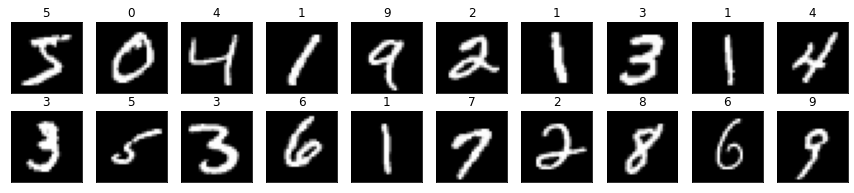

In [4]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_train[i]), cmap='gray')
 ax.set_title(y_train[i])

In [5]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(28, 28, 1)


## Building the neural network

It is time to define our (deep) neural network. We use 8 layers of different types:

In [6]:
# defining the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inp_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

## Train the network

We can now train our model. In general, the quality of the network increases with the number of training epochs and batch size.

In [59]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 10s - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0290 - val_accuracy: 0.9923 - 10s/epoch - 23ms/step
Epoch 2/10
422/422 - 9s - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0310 - val_accuracy: 0.9923 - 9s/epoch - 22ms/step
Epoch 3/10
422/422 - 9s - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0286 - val_accuracy: 0.9922 - 9s/epoch - 22ms/step
Epoch 4/10
422/422 - 10s - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0262 - val_accuracy: 0.9933 - 10s/epoch - 23ms/step
Epoch 5/10
422/422 - 10s - loss: 0.0232 - accuracy: 0.9921 - val_loss: 0.0284 - val_accuracy: 0.9923 - 10s/epoch - 23ms/step
Epoch 6/10
422/422 - 9s - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0287 - val_accuracy: 0.9927 - 9s/epoch - 22ms/step
Epoch 7/10
422/422 - 10s - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0300 - val_accuracy: 0.9930 - 10s/epoch - 23ms/step
Epoch 8/10
422/422 - 10s - loss: 0.0176 - accuracy: 0.9936 - val_loss: 0.0239 - val_accuracy: 0.9942 - 10s/epoch - 23ms/step
Epoch 

In [1]:
# ploting the learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

NameError: name 'pyplot' is not defined

## Evaluate the network

We now evaluate our model on previously unseen images:

In [61]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.19999837875366


Finally, we can use our network for image classification. In the following code block, assign different numbers to image_idx to classify different images:

Predicted: 4  Correct: 4


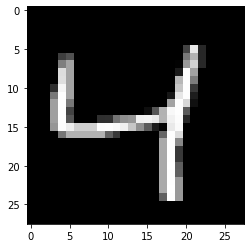

In [62]:
image_idx = 2
image = x_train[image_idx]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')
# make a prediction
# reshaping the image for model input
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(argmax(yhat)), ' Correct: {}'.format(y_train[image_idx]))

#### Exercise 13.1: Use the CNN from above and try to find a training sample that is *incorrectly* classified. You may also retrain the network with a lower of epochs to decrease the quality in order to make this task easier.